In [1]:
#import cdms
#import cats
from cats.cdataframe import CDataFrame

from ROOT import TCanvas

import matplotlib.pyplot as plt

# Create a canvas to draw on
c = TCanvas(
    "c", # Name for ROOT to use internally
    "",  # Title (not visible)
    800, # Width
    500  # Height
)


Welcome to JupyROOT 6.24/06


In [2]:
# filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Tests/Test/Submerged/Test_23231122_235155.root"
#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Tests/TestV04-15pre/Submerged/TestV04-15pre_23231122_235155.root"
#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231128_010456.root"


#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231201_172327.root" # 0V
#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231201_.root" # 10V
#filepath = "/sdf/home/y/yanliu/Prompt_V04-15_P0.1.9_23231201_221854.root" # 10V

#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231202_024711.root" #25V
#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231202_112326.root" #25V
#Prompt_V04-15_P0.1.9_23231202_220915.root
#Prompt_V04-15_P0.1.9_23231203_014740.root
#

#filepath = "/sdf/home/y/yanliu/Z3_25V_10.root"
#filepath = "/sdf/home/y/yanliu/Z3_0V_all.root"

filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231204_173023.root" # 50V

#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231205_015702.root" # 0V after breakdown

#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Prompt/Prompt_V04-15_P0.1.9/Submerged/Prompt_V04-15_P0.1.9_23231205_121139.root"

In [3]:
#df = CDataFrame("rqDir/zip3", filepath)
#df = df.AddFriend(f"{filepath}:rqDir/eventTree")

df = CDataFrame("rqDir/zip3", filepath, [f"{filepath}:rqDir/eventTree"])


In [11]:
#df_cut = df.Filter("PTOFamps>0 && PTOFamps<1e-4")\
#           .Filter("PTOFchisq>0")\
#           .Filter("EventType==1")

df_test = df.Filter("PTOFamps>0")\
            .Filter("EventType==1")\
            .Filter("PTOFamps>4e-6 && PTOFamps<9e-6 ")\
            #.Filter("PTOFchisq<60000")\
            #.Filter("PTOFamps<3e-5")\
            #.Filter("PTOFamps>1e-6")\
            

#ylim = 40e-7
ylim = 1e-5

hist_test = df_test.Histo1D(
    (
        "Histogram",
        "title",
        #"PTOFamps Z3 25V (23231202_024711, PTOFchisq<200000 & PTOFamps<7e-7)",
        100,
        0,
        ylim,
    ),
    'PTOFamps')


hist_2D = df_test.Histo2D(
    (
        "Histogram",
        "PTOFchisq vs. PTOFamps ;PTOFamps;PTOFchisq",
        100,
        0,
        ylim,
        100,
        20000,
        200000
    ),
    'PTOFamps',
    'PTOFchisq')


#hist.SetLineColor(0)
#hist_test.SetLineColor(2)

#hist_test.Sumw2()

hist_test.Draw()
#hist_2D.Draw("COLZ")
# hist_test.Draw("same")


c.SetLogx(0)
c.SetLogy(1)
c.SetLogz(1)
%jsroot on
c.Draw()

In [12]:
#df_test = df.Filter("PTOFamps>0")\
#            .Filter("EventType==1")\
#            .Filter("PTOFamps<90e-6 && PTOFamps>70e-6")\
#            .Filter("PTOFchisq<400000")\
            #.Filter("PTOFamps>3e-7")\
            
arr = df_test.AsNumpy(["PTOFamps","DumpNumber","EventNumber","EventType","EventTime"])

In [13]:
arr

{'PTOFamps': ndarray([7.40472408e-06, 6.81605260e-06, 6.13797961e-06, 8.04409335e-06,
          5.93146429e-06, 7.69045815e-06, 6.33064208e-06, 4.47441322e-06,
          8.39538260e-06, 6.54860822e-06, 6.18208591e-06, 7.62057684e-06,
          6.08367423e-06, 7.15067053e-06, 6.18899544e-06, 5.67985483e-06,
          6.28035793e-06, 5.58366582e-06, 5.72344149e-06, 5.62204129e-06,
          7.12764205e-06, 8.51956666e-06, 4.67332817e-06, 5.86549869e-06,
          5.98566157e-06, 6.70942037e-06, 5.75021597e-06, 5.65936997e-06,
          7.14289447e-06]),
 'DumpNumber': ndarray([ 5.,  5.,  6.,  6.,  7.,  8., 12., 12., 13., 15., 15., 16., 16.,
          17., 18., 20., 22., 24., 31., 31., 32., 33., 35., 36., 36., 41.,
          45., 46., 48.]),
 'EventNumber': ndarray([ 50019.,  50306.,  60094.,  60623.,  70674.,  80444., 120177.,
          120707., 130724., 150160., 150256., 160542., 160584., 170805.,
          180527., 200325., 220243., 240827., 310237., 310378., 320574.,
          330876.

[    0.   121.   324.   472.   815.  1107.  2179.  2393.  2660.  3062.
  3109.  3544.  3567.  3868.  4116.  4601.  5217.  5972.  7913.  7966.
  8396.  8699.  9149.  9369.  9527. 10923. 12175. 12387. 13113.]


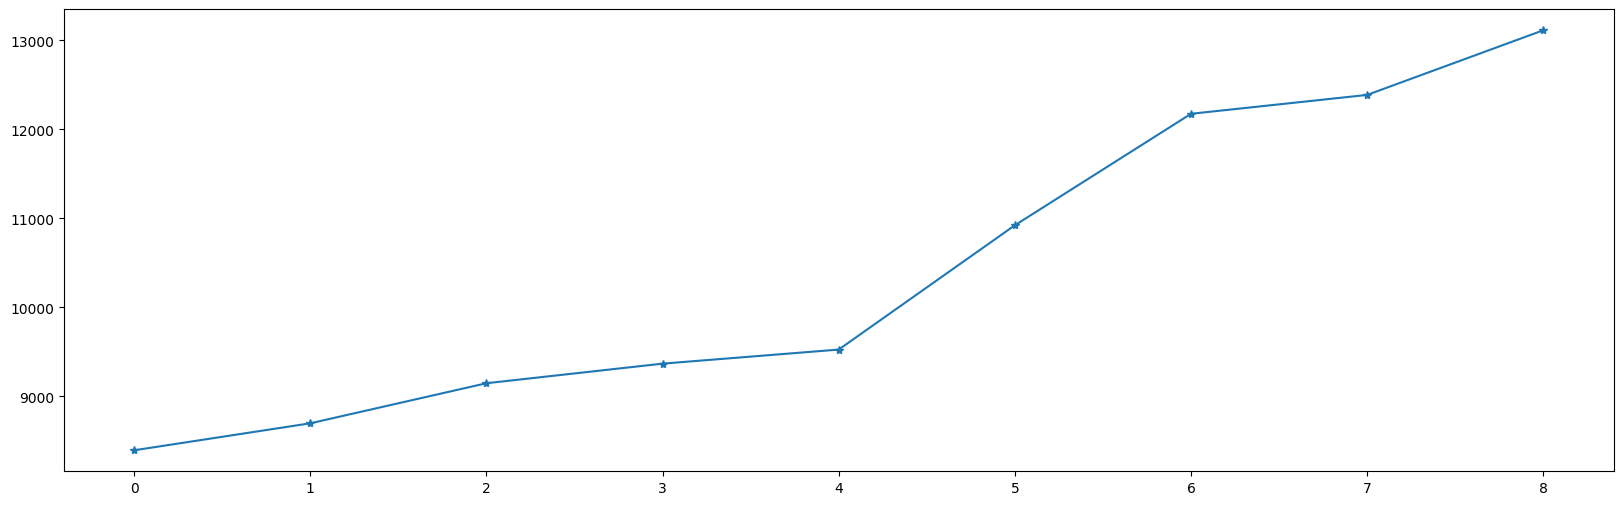

In [14]:
plt.figure(figsize=(20,6))

plt.plot(arr["EventTime"][20:40]-arr["EventTime"][0], marker="*")

print (arr["EventTime"][:40]-arr["EventTime"][0])


In [37]:
df_cut = df.Filter("PTOFamps>2e-5 && PTOFamps<1e-4")\
           .Filter("PTOFchisq>0")

arr = df_cut.AsNumpy(["PTOFamps","DumpNumber","EventNumber","EventType"])

In [45]:
arr

{'PTOFamps': ndarray([2.51490763e-05, 5.35812635e-05, 5.09279746e-05, 7.02405666e-05,
          6.08392420e-05, 8.98713579e-05, 4.17317125e-05, 7.03895904e-05,
          6.89569191e-05, 6.21830620e-05, 4.35472727e-05, 4.30757618e-05,
          7.91664417e-05, 5.46000368e-05, 8.00489570e-05, 4.32738845e-05,
          4.08700506e-05, 9.04244098e-05, 8.94190121e-05, 4.39389930e-05,
          8.37507294e-05, 6.78231049e-05, 2.75775562e-05, 4.21396108e-05,
          7.56460087e-05, 4.79783424e-05, 6.25347488e-05, 9.53239892e-05,
          7.88504383e-05, 8.12166779e-05, 7.01871615e-05, 6.89721022e-05,
          7.13216377e-05, 9.28240637e-05, 2.13285696e-05, 6.30361527e-05,
          7.18196172e-05, 4.37653871e-05, 4.11939098e-05, 2.45026791e-05,
          8.18033066e-05, 9.23268778e-05, 4.25059815e-05, 8.71464709e-05,
          5.51925654e-05, 9.14068463e-05, 7.07166856e-05, 8.78545112e-05,
          3.97386210e-05, 5.13852235e-05, 7.98448313e-05, 5.10218335e-05,
          7.01365533e-05, 


Baseline resolusion     LED pulse amp   
PTOFamps0, randoms    PTOFamps, physics      STN ratio        bias
Sigma = 2.04749e-08   Mean = 1.03735e-05        506           50%
Sigma = 2.51367e-08   Mean = 1.31784e-05        524           40%
Sigma = 2.70745e-08   Mean = 1.48298e-05        547           35%
Sigma = 2.84921e-08   Mean = 1.69874e-05        596           30%
Sigma = 4.22028e-08   Mean = 1.62393e-05        384           25%


1.69874e-05/

In [22]:
1.62393e-05/4.22028e-08

384.7920043219881

In [33]:
1.31784e-05/2.51367e-08

524.2692954922485

In [12]:
1.03735e-05/2.04749e-08

506.64472109753893

In [17]:
1.48298e-05/2.70745e-08

547.7404938226006

In [18]:
import cdms
import rawio

filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231201_172327/23231201_172327_F0001.mid.gz"

myreader = rawio.RawDataReader(filepath)

events = myreader.read_events(nb_events=1000, output_format=2,
                                  skip_empty=True,
                                  trigger_types=[2],
                                  detector_nums=[2],
                                  channel_names="PAS2")

INFO: Found 1 midas raw data files
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231201_172327/23231201_172327_F0001.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231201_172327/23231201_172327_F0001.mid.gz


In [20]:
events

[{'event': {'SeriesNumber': 23231201172327,
   'EventNumber': 10001,
   'EventTime': 1701469410,
   'TriggerType': 2,
   'ReadoutType': 1,
   'NumTriggers': 1,
   'PollingEndTime': 0.0,
   'SIMSeriesNumber': 0,
   'SIMRecoilEnergy': 0.0,
   'SIMAvgX': 0.0,
   'SIMAvgY': 0.0,
   'SIMAvgZ': 0.0,
   'EventTriggerID': 0,
   'DumpNumber': 1},
  'trigger': {'TriggerTime': 3549.8864746,
   'TriggerDetNum': 0,
   'TriggerStatus': 0,
   'TriggerAmplitude': 0,
   'TriggerUnixTime': 0,
   'TriggerNums': 1,
   'TriggerWord': 0,
   'TriggerMask': 0},
  'trigger_veto': {'Z3': {'DeadTime0': -999999.0,
    'DeadTime1': -999999.0,
    'LiveTime0': -999999.0,
    'LiveTime1': -999999.0,
    'LostTriggers0': -999999.0,
    'LostTriggers1': -999999.0,
    'ReadoutStatus': 1.0,
    'SeriesTime': 3549.8864746,
    'TriggerVetoReadoutTime0': -999999.0,
    'TriggerVetoReadoutTime1': -999999.0,
    'WaveformReadEndTime': 3551.9849727,
    'WaveformReadStartTime': 3551.8288895}}},
 {'event': {'SeriesNumber': 2